## Check volatility of Items

+ 하나의 상점내에서 물건들이 차지하는 비율 (상점의 총 ind_size에서 각 물건의 ind_size비율을 조사)의 변동성을 조사

In [1]:
import pandas as pd

In [3]:
industry = pd.read_csv('../data/raw/Industry Data.csv')
retail = pd.read_csv('../data/raw/Retail Data.csv')

In [4]:
# 매 달 store 1의 총 ind_size을 확인
# item별로 ind_size을 확인

,Month,Industry Size,Store,Product Type,Item
0,2015-01-01 00:00:00,2,1,Electronics,Keyboard
1,2015-01-01 00:00:00,1,1,Grocery,Steak
2,2015-01-01 00:00:00,1,1,Home Goods,Paint
3,2015-02-01 00:00:00,1,1,Grocery,Shrimp
4,2015-03-01 00:00:00,2,1,Electronics,Phone Charger
...,...,...,...,...,...
352889,2022-03-01 00:00:00,1,642,Grocery,Noodles
352890,2022-03-01 00:00:00,1,642,Grocery,King Crab
352891,2022-03-01 00:00:00,1,642,Home Goods,Glue
352892,2022-03-01 00:00:00,1,642,Home Goods,Nails


In [5]:
store1 = industry[industry['Store'] == 1]

In [6]:
store1

,Month,Industry Size,Store,Product Type,Item
0,2015-01-01 00:00:00,2,1,Electronics,Keyboard
1,2015-01-01 00:00:00,1,1,Grocery,Steak
2,2015-01-01 00:00:00,1,1,Home Goods,Paint
3,2015-02-01 00:00:00,1,1,Grocery,Shrimp
4,2015-03-01 00:00:00,2,1,Electronics,Phone Charger
...,...,...,...,...,...
717,2022-03-01 00:00:00,2,1,Grocery,Noodles
718,2022-03-01 00:00:00,5,1,Grocery,Steak
719,2022-03-01 00:00:00,1,1,Grocery,King Crab
720,2022-03-01 00:00:00,1,1,Home Goods,Nails


<AxesSubplot:xlabel='Month'>

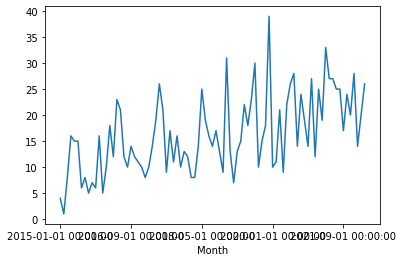

In [8]:
store1.groupby(store1.Month)['Industry Size'].sum().plot()

<AxesSubplot:xlabel='Month'>

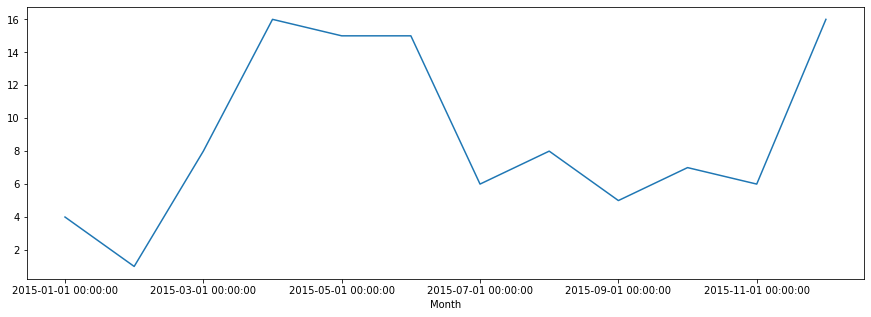

In [35]:
# 주기성을 확인해보자
# 1년만 먼저 보기
store1_2015 = store1[(store1.Month >= '2015-01-01 00:00:00') & (store1.Month < '2016-01-01 00:00:00')]

store1_2015.groupby(store1_2015.Month)['Industry Size'].sum().plot(figsize=(15,5))

In [20]:
# 주기성이 있는것같긴한데 좀 애매하네
# store1의 시계열성 확인
# Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

def adf_test(y):
    # augmented dickey fuller
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['test statistic','p-value', '# of lags','# of observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value ({})'.format(key)] = value
    return dfoutput

adf_test(store1.groupby(store1.Month)['Industry Size'].sum())
# p-value가 쥰내큼 -> non stationary -> 시간 변화에 따른 통계적 특성이 일정하지 않음


test statistic          -0.822918
p-value                  0.812297
# of lags               11.000000
# of observations       75.000000
Critical Value (1%)     -3.520713
Critical Value (5%)     -2.900925
Critical Value (10%)    -2.587781
dtype: float64

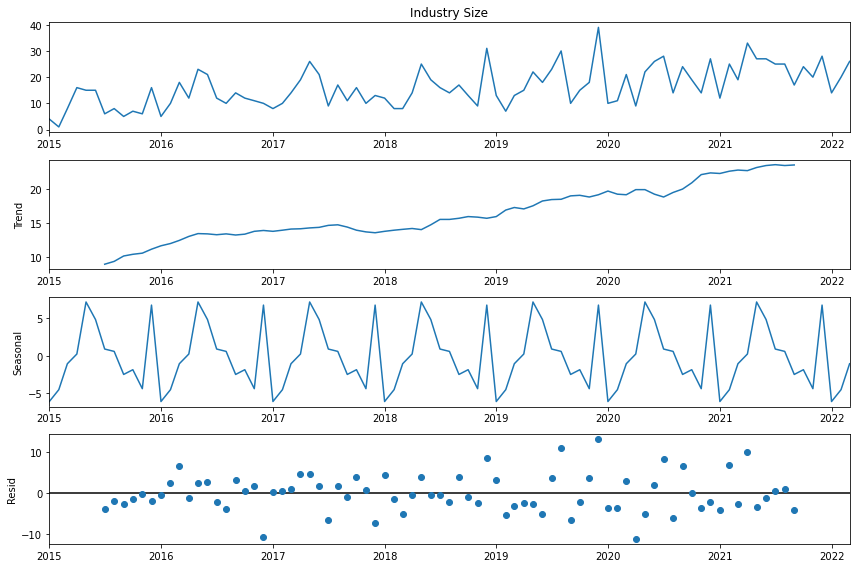

In [33]:
#계절성 분해
from statsmodels.tsa.seasonal import seasonal_decompose

df = store1.groupby(store1.Month)['Industry Size'].sum()
df.index = pd.to_datetime(df.index)

ts = df
result = seasonal_decompose(ts, model='additive')

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
result.plot()
plt.show()

#계절성, 트렌드 지리네

In [34]:
store1

,Month,Industry Size,Store,Product Type,Item
0,2015-01-01 00:00:00,2,1,Electronics,Keyboard
1,2015-01-01 00:00:00,1,1,Grocery,Steak
2,2015-01-01 00:00:00,1,1,Home Goods,Paint
3,2015-02-01 00:00:00,1,1,Grocery,Shrimp
4,2015-03-01 00:00:00,2,1,Electronics,Phone Charger
...,...,...,...,...,...
717,2022-03-01 00:00:00,2,1,Grocery,Noodles
718,2022-03-01 00:00:00,5,1,Grocery,Steak
719,2022-03-01 00:00:00,1,1,Grocery,King Crab
720,2022-03-01 00:00:00,1,1,Home Goods,Nails


In [45]:
store1_2015 = store1[(store1.Month >= '2015-01-01 00:00:00') & (store1.Month < '2016-01-01 00:00:00')]

store1_2015
# 2015년의 월별로 group by 를 하고, 
store1_2015.Month = pd.to_datetime(store1_2015.Month)

C:\Users\user\AppData\Local\Temp\ipykernel_5516\888008360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  store1_2015.Month = pd.to_datetime(store1_2015.Month)


In [46]:
store_temp = store1_2015[(store1_2015.Month.dt.month >=1) & (store1_2015.Month.dt.month < 2)]

In [47]:
store_temp

,Month,Industry Size,Store,Product Type,Item
0,2015-01-01,2,1,Electronics,Keyboard
1,2015-01-01,1,1,Grocery,Steak
2,2015-01-01,1,1,Home Goods,Paint


In [48]:
#아... 당연히 매입을 안한 제품들도 있네... 
# 결국 그러면 각 store별 품목별 예측 모델을 만들어야겠네..